#Importing libraries for Naive Bayes Classifier

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = data.target_names

#Initializing training and testing datasets

In [0]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

train.data[5] # - this command is used to check the 5th row of our train data 

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [0]:
test.data[5] # - This command is used to check the 5th row of our test data

'From: banschbach@vms.ocom.okstate.edu\nSubject: Re: Candida(yeast) Bloom, Fact or Fiction\nOrganization: OSU College of Osteopathic Medicine\nLines: 91\nNntp-Posting-Host: vms.ocom.okstate.edu\n\nIn article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:\n> \n> In a previous article, banschbach@vms.ocom.okstate.edu () says:\n>>least a few "enlightened" physicians practicing in the U.S.  It\'s really \n>>too bad that most U.S. medical schools don\'t cover nutrition because if \n>>they did, candida would not be viewed as a non-disease by so many in the \n>>medical profession.\n> \n> Case Western Reserve Med School teaches nutrition in its own section as\n> well as covering it in other sections as they apply (i.e. B12\n> deficiency in neuro as a cause of neuropathy, B12 deficiency in\n> hematology as a cause of megaloblastic anemia), yet I sill\n> hold the viewpoint of mainstream medicine:  candida can cause\n> mucocutaneous candidiasis, and, in already

In [0]:
len(train.data) # len() - command is used to check the leangth of the dataset

11314

#Now we create a machine learning model pipeline object "model" using the Naive Bayes classifier. We also fit the model using the train data and the target data and predict the model using the test data.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

# Importing the confusion matrix from sklearn.metrics to create our confusion matrix table and we visualize it using the heatmap from the Seaborn library

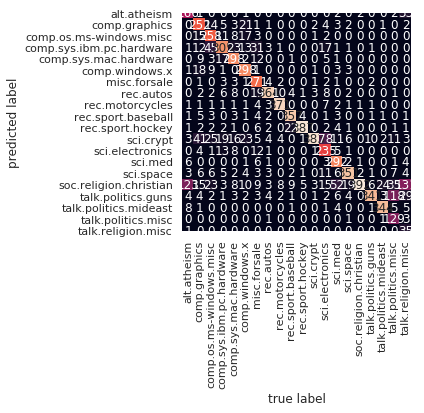

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True,annot=True,fmt = 'd', cbar=False,
            xticklabels = train.target_names,
            yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Creating a predict_category function for testing our trained Naive Bayes Model

In [0]:
def predict_category(s, train = train, model = model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

# Running some sample experiments to test our Naive Bayes Model

In [0]:
predict_category('Jesus Christ') # Input - Jesus Christ ; Output Prediction Category - Religion.Chrisian

'soc.religion.christian'

In [0]:
predict_category('bike') # Input - bike ; Output Prediction Category - Motorcycles

'rec.motorcycles'